In [425]:
class LinearRegreesionModel:
    '''
    采用gradient descent进行训练的线性模型
    '''
    def __init__(self,lr=0.03,epoches=1000,lbd=0):
        '''
        lr, learning rate
        epoches
        lbd, lambda for regularization
        '''
        self.lr = lr
        self.epoches = epoches
        self.lbd = lbd
        self.theta = None
        self.loss_history = []

    def get_parameters(self):
        return self.theta
        
    def predict(self,X):
        '''
        预测y
        '''
        X_temp = np.concatenate((np.ones((X.shape[0],1),dtype=np.float32),X),axis=1)
        return X_temp@self.theta

    def _error(self,p,y):
        '''
        return error between predict p and target y
        '''
        return p-y
    
    def _loss(self,X,y):
        '''
        计算Mean squared error AND grad
        '''
        X_temp = np.concatenate((np.ones((X.shape[0],1),dtype=np.float32),X),axis=1)
        m = X_temp.shape[0]
        p = X_temp@self.theta
        error = self._error(p,y)
        theta_temp = self.theta.copy()
        theta_temp[0] = 0
        
        loss = ((error.T@error) + self.lbd*theta_temp.T@theta_temp)/2/m
        loss = loss.item()
        grad = (X_temp.T@error + self.lbd*theta_temp)/m
        
        return loss,grad
   
    def history(self):
        return self.loss_history,self.grad_history

    def noramlEquation(self,X,y):
        X_temp = np.concatenate((np.ones((X.shape[0],1),dtype=np.float32),X),axis=1)
        return np.linalg.inv(X_temp.T@X_temp)@X_temp.T@y
    
    def fit(self,X,y):
        '''
        fit data by gradient descent
        '''
        self.loss_history = []
        self.grad_history = []
        m,n = X.shape
        
        self.theta = np.zeros((n+1,1))
        for epoch in range(self.epoches):
            loss,grad = self._loss(X,y)
            self.loss_history.append(loss)
            self.grad_history.append(grad)

            self.theta = self.theta - self.lr*grad
            
            if (epoch+1) % 100 == 0:
                print(f'epoch:{epoch+1} loss:{loss}')

            if loss < 1e-6:
                break

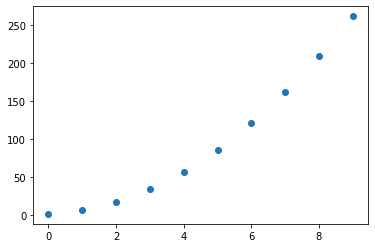

In [426]:
# test data

import numpy as np
import matplotlib.pyplot as plt

num = 10

x = np.arange(num)

X = np.empty((num,2))

X[:,0] = x
X[:,1] = x**2

y = 1 + 2*x + 3*x**2

plt.scatter(x,y)

epoch:100 loss:370.4045929185578
epoch:200 loss:19.232351644059186
epoch:300 loss:4.107421109059067
epoch:400 loss:3.4431191619447956
epoch:500 loss:3.401132981564831
epoch:600 loss:3.385980907322113
epoch:700 loss:3.3720383270992578
epoch:800 loss:3.358202354043847
epoch:900 loss:3.34442530543769
epoch:1000 loss:3.330704906352122


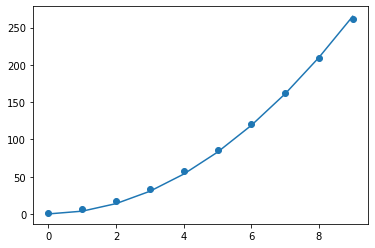

In [438]:
model = LinearRegreesionModel(lr=0.00001)

model.fit(X,y.reshape(-1,1))

p = model.predict(X)

plt.scatter(x,y)
plt.plot(x,p)

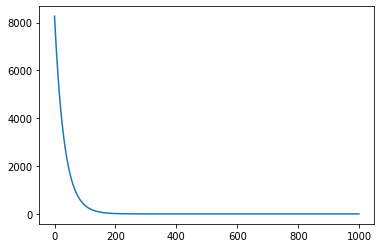

In [439]:
loss_history,grad_hisltory = model.history()
plt.plot(loss_history)

In [441]:
model.noramlEquation(X,y)

array([1., 2., 3.])

In [442]:
model.get_parameters().flatten()

array([0.07592699, 0.46007852, 3.22085559])